# Simple Neural Network

Here is a simple example of how you can create and train a neural network using the MNIST dataset in PyTorch. This is the simpliest dataset to use. MNIST is a dataset of images of 28 x 28 of handwritten digits. The objective of the nn is to detect which number is written.

We start importing the libraries.

In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F

C:\Users\denis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Hyperparameters

#This is the because the size of the images are 28 x 28
input_size = 784

#The size of the intermidate layer
hidden_size = 256

#The number of final categories we have (digits from 0 to 9)
num_classes = 10

#how many times the nn will train
num_epochs = 3

#how big are the lots of data that we will be loading at the same time
#These data are not very heavy but they usually do batch because the nn usually take massive amount of data
#Lots of size 8 to 64 are usually made, this to avoid overfitting and other reasons
batch_size = 128

#how the descend of the gradient change
learning_rate = 0.001

In [4]:
# Load the MNIST dataset
train_dataset = datasets.MNIST(root='data', train=True, 
                               transform=transforms.ToTensor(),
                               download=True)
test_dataset = datasets.MNIST(root='data', train=False, 
                              transform=transforms.ToTensor())

A data loader is a PyTorch utility that provides a convenient way to load and batch data for training or evaluation. In PyTorch, data is usually represented as tensors (not as a physics tensor, it is just a normal array with gradients), and you can use data loaders to load tensor data from a dataset and apply transformations to the data as it is loaded.

In [5]:
# Create the data loaders
train_loader = data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In this example, the `train_dataset` and `test_dataset` variables are PyTorch datasets that contain the MNIST training and test data, respectively. The `train_loader` and `test_loader` variables are data loaders that provide an iterable over the training and test data, respectively. The data loaders apply the `transforms.ToTensor` transformation to the data as it is loaded, which converts the data from a PIL image to a PyTorch tensor.

Lets give a look to the data.

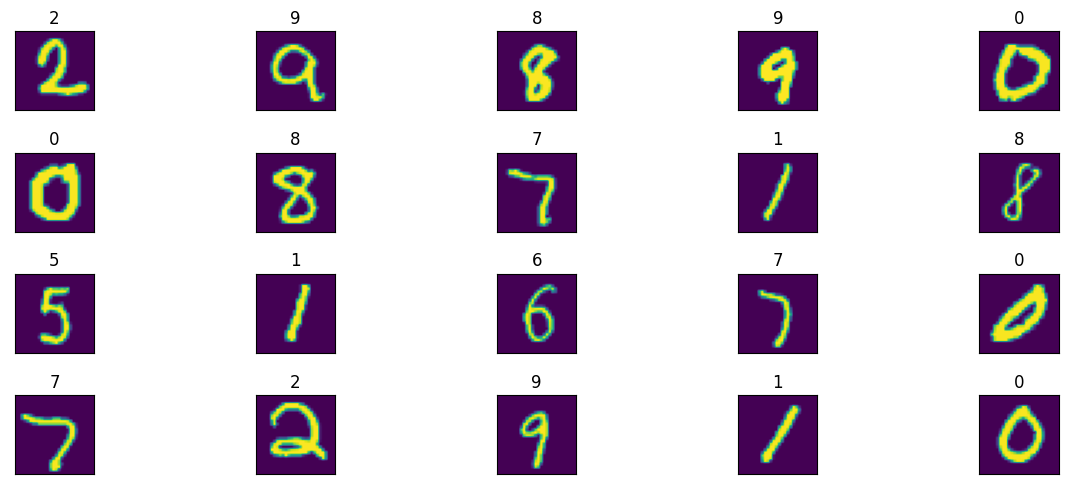

In [6]:
from matplotlib.pyplot import figure
dataiter = iter(train_loader)
images, labels = dataiter.next()

fig = figure(figsize=(15,5))
for idx in np.arange(20):
    ax = fig.add_subplot(4, int(20/4), idx+1, xticks = [], yticks = [])
    ax.imshow(np.squeeze(images[idx])) #,cmap = 'gray'
    ax.set_title(labels[idx].item())
    fig.tight_layout()

In [7]:
# Define the model as we did in the last notebook
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [8]:
#we define the model and move the model to the device
model = SimpleNet(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes).to(device)

In [9]:
print(model)

SimpleNet(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [10]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [11]:
# Train the model
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Move the inputs and labels to the device
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs.view(-1, 28*28))

        
        # Compute the loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update the weights
        optimizer.step()
    print(loss)

tensor(0.1261, grad_fn=<NllLossBackward0>)
tensor(0.0414, grad_fn=<NllLossBackward0>)
tensor(0.0349, grad_fn=<NllLossBackward0>)


In [12]:
correct = 0
total = 0
 
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        output = model(inputs.view(-1, 28*28))
        for idx, i in enumerate(output):
            if(torch.argmax(i) == labels[idx]):
                correct += 1
            total += 1
print("Acurracy: ", round(correct/total, 3))

Acurracy:  0.967
